# Trabajo Integrador - Bootcamp Data Science

**Estudiante**: Orlando Velásquez

El trabajo integrador consiste en desarrollar un proceso de Ciencia de Datos sobre un escenario relacionado con los pagos de una entidad financiera.

## *Previamente se ha realizado la creación de un Virtual Environment vía consola CMD, de la siguiente forma:*

1- python -m pip install virtualenv (Para instalar virtualenv): Requirement already satisfied

2- python -m virtualenv --version (Para saber la versión instalada): virtualenv 20.23.1

3- python -m venv C:\Users\ovcor\Tarea_Alkemy\venv (Para crear el ambiente virtual)

4- C:\Users\ovcor\Tarea_Alkemy\venv\scripts\activate (Para activar el ambiente virtual)

## Análisis Exploratorio

Esta sección contiene el análisis exploratorio de los datos.

Se definen las columnas con sus tipos de datos y luego un análisis de cada característica.

Importamos las dependencias del proyecto con las que vamos a trabajar

In [ ]:
##librerias##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter
import warnings;
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df = pd.read_csv("data.csv")
df = df.set_index('ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
##INFORMACION DE LOS DATOS##
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

**Todos los campos son numéricos, y no existen valores nulos ya que no se permiten.**

In [9]:
df.describe().round()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,...,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,...,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


## VARIABLES
Realizamos el análisis exploratorio por cada variable para conocer sus valores, y distribuciones

In [ ]:
df['LIMIT_BAL'].describe()

In [ ]:
##Grafico CAJA BIGOTE
df['LIMIT_BAL'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='LIMIT_BAL')

In [ ]:
sns.displot(data=df, x='LIMIT_BAL', kind="kde")

A partir del analisis de la distribución de la variable LIMIT_BAL, se evidencia una concentración del conjunto de datos en el intervalo [0,600000] aproximadamente.
Los valores superiores a 600000 podrían ser considerados como **atípicos**

In [ ]:
df['SEX'].describe()

In [ ]:
df['SEX'].value_counts()

In [ ]:
df['SEX'].value_counts().plot(kind="bar")

Al ser una variable de solo dos valores, se revisa qué valor pesa más. En este caso, el valor 2. 

In [ ]:
df['EDUCATION'].describe()

In [ ]:
df['EDUCATION'].value_counts()

In [ ]:
##Grafico CAJA BIGOTE
df['EDUCATION'].plot(kind="box")

In [ ]:
df['EDUCATION'].value_counts().plot(kind="bar")

Se puede extraer de los gráficos que la mayor concentración está en el intervalo [1,3], y que los valores sobre 3 son marginales.

In [ ]:
df['MARRIAGE'].describe()

In [ ]:
df['MARRIAGE'].value_counts()

In [ ]:
df['MARRIAGE'].value_counts().plot(kind="bar")

Al ser dos valores predominantes según el conteo, se puede extraer que los valores distintos de 1 y 2 son marginales, y que ambos tienen un peso similar.

In [ ]:
df['AGE'].describe()

In [ ]:
sns.displot(data=df, x="AGE", kind = "ecdf")

In [ ]:
df['AGE'].value_counts().plot(kind="bar")

In [ ]:
df["AGE"].plot(kind="box")

La variable AGE varía en el intervalo [20,60], considerando los valores mayores a 60 son marginales.

In [ ]:
bloque1 = [ 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]
for columns in bloque1:
    plt.hist(df[columns], bins=20)
    plt.title(columns) , plt.xlabel("Meses de Retraso en el Pago"), plt.ylabel("Q de Clientes")
    plt.show()

In [ ]:
sns.displot(data=df, y='PAY_0', kind="ecdf")

Esta variable muestra mayor distribución del total en el valor 0, con una notoria proporción.

In [ ]:
sns.displot(data=df, y='PAY_2', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_3', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_4', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_5', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_6', kind="ecdf")

In [ ]:
df['BILL_AMT1'].describe()

In [ ]:
df['BILL_AMT1'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT1', kind="kde")

In [ ]:
df['BILL_AMT2'].describe()

In [ ]:
df['BILL_AMT2'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT2', kind="kde")

In [ ]:
df['BILL_AMT3'].describe()

In [ ]:
df['BILL_AMT3'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT3', kind="kde")

In [ ]:
df['BILL_AMT4'].describe()

In [ ]:
df['BILL_AMT4'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT4', kind="kde")

In [ ]:
df['BILL_AMT5'].describe()

In [ ]:
df['BILL_AMT5'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT5', kind="kde")

In [ ]:
df['BILL_AMT6'].describe()

In [ ]:
df['BILL_AMT6'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT6', kind="kde")

In [ ]:
df['PAY_AMT1'].describe()

In [ ]:
df['PAY_AMT1'].plot(kind='hist')

In [ ]:
df['PAY_AMT1'].plot(kind='box')

In [ ]:
df['PAY_AMT2'].describe()

In [ ]:
df['PAY_AMT2'].plot(kind='hist')

In [ ]:
df['PAY_AMT2'].plot(kind='box')

In [ ]:
df['PAY_AMT3'].describe()

In [ ]:
df['PAY_AMT3'].plot(kind='hist')

In [ ]:
df['PAY_AMT3'].plot(kind='box')

In [ ]:
df['PAY_AMT4'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT4', kind="hist")

In [ ]:
df['PAY_AMT5'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT5', kind="hist")

In [ ]:
df['PAY_AMT6'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT6', kind="hist")

In [ ]:
df['default.payment.next.month'].value_counts()

In [ ]:
df['default.payment.next.month'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Matriz de Correlación de Calor')

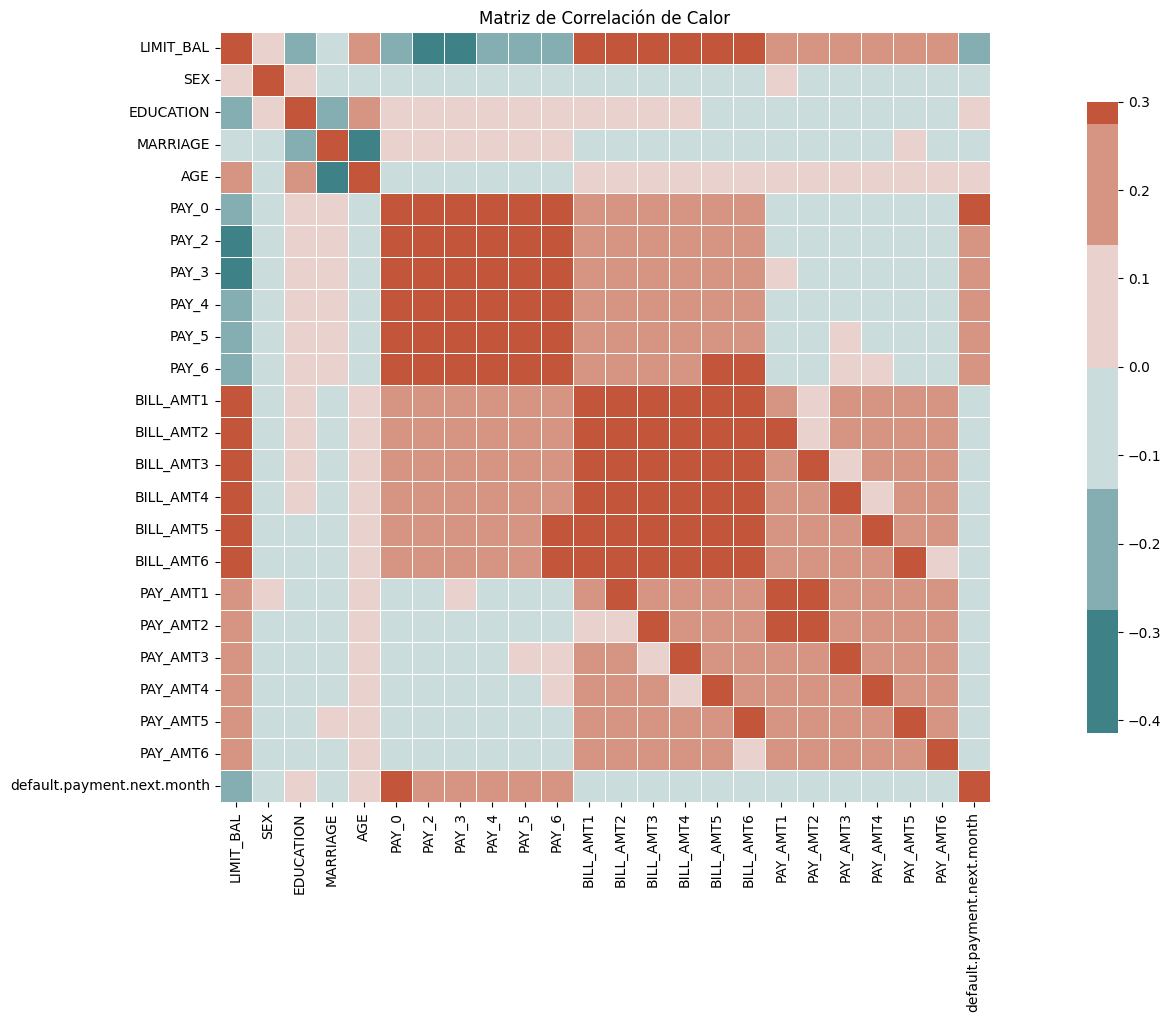

In [10]:
corr = df.corr()
plt.figure(figsize = (25,10))
cmap = sns.diverging_palette(200, 20, as_cmap=False)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Matriz de Correlación de Calor')

Las variables que más correlación tienen son: PAY_X con BILL_AMTX y LIMIT_BAL con BILL_AMTX

Las variables con menos correlación son: PAY_X con LIMIT_BAL

## PROCESAMIENTO

In [11]:
x = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']
#COMPROBAR DATASET SIN VARIABLE RESPUESTA
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [12]:
columnas_num = x.select_dtypes(include=['float64', 'int64']).columns
#EXCLUSION DE VARIABLES CATEGÓRICAS
excluir = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
columnas_num = [col for col in columnas_num if col not in excluir]
columnas_num

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [13]:
ss = StandardScaler()
x[columnas_num] = ss.fit_transform(x[columnas_num])
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
4,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,1,3,1,0.381275,0,0,0,0,0,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29997,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29998,-1.059646,1,2,2,0.164303,4,3,2,-1,0,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001


## ENTRENAMIENTO

In [14]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.30,random_state=0)
print(len(x_train))
print(len(x_test))

21000
9000


### Modelo Regresión Logística

In [43]:
mod1 = LogisticRegression(solver='lbfgs',
                            max_iter=  100,
                            penalty='l2',
                            class_weight=None,
                            random_state=16)
mod1.fit(x_train, y_train)
predicciones = mod1.predict(X = x_test,)
Matriz_confusion = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
accuracy = mod1.score(x, y)
print("Intercept:", mod1.intercept_) # b0
print("Coeficiente:", list(zip(x.columns, mod1.coef_.flatten(), ))) # b1
print("Exactitud de entrenamiento:", mod1.score(x, y)) # Cuanto datos clasifico correctamente
print("Matriz de confusión")
print('')
print(Matriz_confusion)
print('')
print(f"La precisión global es: {100 * accuracy}%")


Intercept: [-0.68631786]
Coeficiente: [('LIMIT_BAL', -0.08473425462829157), ('SEX', -0.13310557628128136), ('EDUCATION', -0.12809010244287267), ('MARRIAGE', -0.17260368798996192), ('AGE', 0.06595398567304314), ('PAY_0', 0.5280528881496807), ('PAY_2', 0.10482537015198774), ('PAY_3', 0.07015155737396746), ('PAY_4', 0.003832922135454087), ('PAY_5', 0.03202258356561093), ('PAY_6', 0.0460604498022514), ('BILL_AMT1', -0.52184908556741), ('BILL_AMT2', 0.1474030645992092), ('BILL_AMT3', 0.19686141253707076), ('BILL_AMT4', 0.0350779297428381), ('BILL_AMT5', 0.014236636919709632), ('BILL_AMT6', 0.0443715900455434), ('PAY_AMT1', -0.27990973622309995), ('PAY_AMT2', -0.2420515927582543), ('PAY_AMT3', -0.11549912516999505), ('PAY_AMT4', -0.06477265976070684), ('PAY_AMT5', -0.049445613828214434), ('PAY_AMT6', -0.042498920006576534)]
Exactitud de entrenamiento: 0.8102
Matriz de confusión

[[6897  163]
 [1493  447]]

La precisión global es: 81.02000000000001%


*Total de elementos de prueba:* **9000**. *Total de elementos correctamente evaluados en 0* = **6897 sobre 8390 (82.2%)**. *Total de elementos correctamente evaluados en 1* = **447 sobre 610 (73.3%)**

In [ ]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = mod1.predict_proba(x_test) 
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
print('AUC: %.2f' % auc) 
plot_roc_curve(fpr, tpr)  

### Arboles de Decisión

In [15]:
mod2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
mod2.fit(x_train, y_train)
mod2_score_train = mod2.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",mod2_score_train)
mod2_score_test = mod2.score(x_test, y_test)
print("Puntaje de Testeo: ",mod2_score_test)

Puntaje de Entrenamiento:  0.8168571428571428
Puntaje de Testeo:  0.826


*Optimización de Hiperparametros*

In [16]:
param = {'max_depth':[2,4,6,8,10]}
est = RandomizedSearchCV(estimator=mod2, param_distributions=param)
est.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10]})

In [17]:
est.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=1)

In [18]:
est.best_params_

{'max_depth': 4}

In [19]:
##Actualización de Mejor Estimador a 4 en máxima profundidad
mod2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
mod2.fit(x_train, y_train)
mod2_score_train = mod2.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",mod2_score_train)
mod2_score_test = mod2.score(x_test, y_test)
print("Puntaje de Testeo: ",mod2_score_test)
preds = mod2.predict(x_test)
print("\nPuntaje de Exactitud: \n{}".format(metrics.accuracy_score(y_test, preds)))
probs = mod2.predict_proba(x_test)[:,1]
print("\nArea Bajo la Curva: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Puntaje de Entrenamiento:  0.8212857142857143
Puntaje de Testeo:  0.8258888888888889

Puntaje de Exactitud: 
0.8258888888888889

Area Bajo la Curva: 
0.7463975570222832


In [20]:
predicciones = mod2.predict(X = x_test,)
print("Matriz de confusión")
print("")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)
print("")
accuracy = mod2.score(x, y)
print(f"La precisión global es: {100 * accuracy}%") 

Matriz de confusión

[[6747  313]
 [1254  686]]

La precisión global es: 82.26666666666667%


*Total de elementos de prueba:* **9000**. *Total de elementos correctamente evaluados en 0* = **6747 sobre 8001 (84.3%)**. *Total de elementos correctamente evaluados en 1* = **686 sobre 999 (68.7%)**

In [ ]:
probs = mod2.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

## Random Forest

In [23]:
Mod3 = RandomForestClassifier(n_estimators=100,
                            random_state=0,
                            max_depth=10)  
Mod3.fit(x_train, y_train) 
Mod3_score_train = Mod3.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",Mod3_score_train)
Mod3_score_test = Mod3.score(x_test, y_test)
print("Puntaje de Testeo: ",Mod3_score_test)

Puntaje de Entrenamiento:  0.857904761904762
Puntaje de Testeo:  0.8245555555555556


In [24]:
param = {'max_depth':[2,4,6,8,10]}
est = RandomizedSearchCV(estimator=Mod3, param_distributions=param)
est.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=0),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10]})

In [25]:
est.best_params_

{'max_depth': 6}

In [29]:
Mod3 = RandomForestClassifier(n_estimators=100,
                            random_state=0,
                            max_depth=6)  
Mod3.fit(x_train, y_train) 
Mod3_score_train = Mod3.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",Mod3_score_train)
Mod3_score_test = Mod3.score(x_test, y_test)
print("Puntaje de Testeo: ", Mod3_score_test)
preds = Mod3.predict(x_test)
print("\nPuntaje de Exactitud: \n{}".format(metrics.accuracy_score(y_test, preds)))
probs = Mod3.predict_proba(x_test)[:,1]
print("\nArea Bajo la Curva: \n{}".format(metrics.roc_auc_score(y_test, probs)))

Puntaje de Entrenamiento:  0.8256666666666667
Puntaje de Testeo:  0.8235555555555556

Puntaje de Exactitud: 
0.8235555555555556

Area Bajo la Curva: 
0.7798914678309629


In [31]:
predicciones = Mod3.predict(X = x_test,)

print("Matriz de confusión")
print("")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)
print("")
accuracy = Mod3.score(x, y)
print(f"La precisión global es: {100 * accuracy}%") 

Matriz de confusión

[[6762  298]
 [1290  650]]

La precisión global es: 82.50333333333333%


*Total de elementos de prueba:* **9000**. *Total de elementos correctamente evaluados en 0* = **6762 sobre 8052 (84%)**. *Total de elementos correctamente evaluados en 1* = **650 sobre 948 (68.6%)**

# Conclusión

Utilizando un 30% de test del total, de los 3 modelos utilizados se extrae que Random Forest es el más exacto con un 82.5% de presición.